In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
from scipy.interpolate import griddata
from utils import extract_datasets, create_dataframe

The NCEI Marine data has no option of narrowing the target data field, i.e longitude and latitude of interest. Since it is of very large size, it was not used.

In [3]:
data = pd.read_csv('data/Marine_CSV_sample.csv')

In [4]:
data.columns

Index(['Identification', 'Latitude', 'Longitude', 'Time of Observation',
       'Ice Accretion On Ship', 'Thickness of Ice Accretion On Ship',
       'Rate of Ice Accretion on Ship', 'Sea Level Pressure',
       'Characteristics of Pressure Tendency', 'Pressure Tendency',
       'Air Temperature', 'Wet Bulb Temperature', 'Dew Point Temperature',
       'Sea Surface Temperature', 'Wave Direction', 'Wave Period',
       'Wave Height', 'Swell Direction', 'Swell Period', 'Swell Height',
       'Total Cloud Amount', 'Low Cloud Amount', 'Low Cloud Type',
       'Cloud Height Indicator', 'Cloud Height', 'Middle Cloud Type',
       'High Cloud Type', 'Visibility', 'Visibility Indicator',
       'Present Weather', 'Past Weather', 'Wind Direction', 'Wind Speed'],
      dtype='object')

In [5]:
data[['Latitude', 'Longitude', 'Time of Observation', 'Sea Surface Temperature']]

,Latitude,Longitude,Time of Observation,Sea Surface Temperature
0,-35.8,2.9,2015-01-12T00:00:00,
1,-35.9,6.9,2015-01-12T12:00:00,
2,-35.9,8.6,2015-01-12T18:00:00,
3,-35.7,11.9,2015-01-13T06:00:00,
4,-35.6,13.7,2015-01-13T12:00:00,
5,-35.4,15.5,2015-01-13T18:00:00,
6,-35.3,17.1,2015-01-14T00:00:00,
7,-35.2,18.6,2015-01-14T06:00:00,
8,-35.2,20.3,2015-01-14T12:00:00,
9,-35.1,21.8,2015-01-14T18:00:00,


Below is monthly data, collected from various stations in particular area, denoted by the coordinates located in the name of the file.

In [6]:
data = pd.read_csv('data/40_130_30_140.csv')

In [7]:
data.columns

Index(['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME',
       'IMMA_VER', 'ATTM_CT', 'TIME_IND', 'LL_IND', 'SHIP_COURSE', 'SHIP_SPD',
       'NAT_SOURCE_IND', 'ID_IND', 'COUNTRY_CODE', 'WIND_DIR_IND', 'WIND_DIR',
       'WIND_SPD_IND', 'WIND_SPEED', 'VV_IND', 'VISIBILITY', 'PRES_WX',
       'PAST_WX', 'SEA_LVL_PRES', 'CHAR_PPP', 'AMT_PRES_TEND', 'IND_FOR_TEMP',
       'AIR_TEMP', 'IND_FOR_WBT', 'WET_BULB_TEMP', 'DPT_IND', 'DEW_PT_TEMP',
       'SST_MM', 'SEA_SURF_TEMP', 'TOT_CLD_AMT', 'LOW_CLD_AMT', 'LOW_CLD_TYPE',
       'HGT_IND', 'CLD_HGT', 'MID_CLD_TYPE', 'HI_CLD_TYPE', 'WAVE_DIR',
       'WAVE_PERIOD', 'WAVE_HGT', 'SWELL_DIR', 'SWELL_PERIOD', 'SWELL_HGT',
       'TEN_BOX_NUM', 'ONE_BOX_NUM', 'DECK', 'SOURCE_ID', 'PLATFORM_ID',
       'DUP_STATUS', 'DUP_CHK', 'NIGHT_DAY_FLAG', 'TRIM_FLAG', 'NCDC_QC_FLAGS',
       'EXTERNAL', 'SOURCE_EXCLUSION_FLAG', 'OB_SOURCE', 'OB_PLATFORM',
       'FM_CODE_VER', 'STA_WX_IND', 'PAST_WX2', 'IND_FOR_WAVE_MEAS',
       'DIR_OF_SWELL

In [8]:
data[['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'SEA_SURF_TEMP']]

,STATION,DATE,LATITUDE,LONGITUDE,SEA_SURF_TEMP
0,3FBJ7,2004-11-01T00:00:00,30.7,138.60,NaN
1,4XFO,2004-11-01T00:00:00,36.7,132.10,217.0
2,9MCN8,2004-11-01T00:00:00,34.0,139.00,250.0
3,9MET6,2004-11-01T00:00:00,30.1,135.20,251.0
4,A8CN9,2004-11-01T00:00:00,38.1,133.60,201.0
...,...,...,...,...,...
3340,JPBN,2004-11-30T21:00:00,33.0,136.50,212.0
3341,JIFH,2004-11-30T22:00:00,33.9,130.00,203.0
3342,JPBN,2004-11-30T22:00:00,33.0,136.50,211.0
3343,9500,2004-11-30T22:30:00,34.0,130.03,202.0


In [9]:
data.groupby(['DATE', 'LATITUDE', 'LONGITUDE'])['SEA_SURF_TEMP'].mean()

DATE                 LATITUDE  LONGITUDE
2004-11-01T00:00:00  30.1      135.20       251.0
                     30.7      138.60         NaN
                     31.1      134.80       258.0
                     31.8      133.90         NaN
                     34.0      139.00       250.0
                                            ...  
2004-11-30T21:00:00  33.0      136.50       212.0
2004-11-30T22:00:00  33.0      136.50       211.0
                     33.9      130.00       203.0
2004-11-30T22:30:00  34.0      130.03       202.0
2004-11-30T23:00:00  33.1      136.60       211.0
Name: SEA_SURF_TEMP, Length: 3344, dtype: float64

In [10]:
data['SEA_SURF_TEMP'][data['LATITUDE'] < 0]

Series([], Name: SEA_SURF_TEMP, dtype: float64)

In [11]:
data['LATITUDE'].max()

39.99

Below is monthly data downloaded from the https://neo.gsfc.nasa.gov/ website. It is monthly data in .nc format.

In [12]:
# reading the dataset for month of July 2024
# dataset = xr.open_dataset('data/AQUA_MODIS.20240701_20240731.L3m.MO.SST.sst.9km.nc')

In [13]:
dataset = xr.open_dataset('data/AQUA_MODIS/LANINA/AQUA_MODIS.20101201_20101231.L3m.MO.SST.sst.9km.nc')

In [14]:
# reading all variables
dataset.variables

Frozen({'sst': <xarray.Variable (lat: 2160, lon: 4320)> Size: 37MB
[9331200 values with dtype=float32]
Attributes:
    long_name:      Sea Surface Temperature
    units:          degree_C
    standard_name:  sea_surface_temperature
    valid_min:      -1000
    valid_max:      10000
    display_scale:  linear
    display_min:    -2.0
    display_max:    45.0, 'qual_sst': <xarray.Variable (lat: 2160, lon: 4320)> Size: 37MB
[9331200 values with dtype=float32]
Attributes:
    long_name:  Quality Levels, Sea Surface Temperature
    valid_min:  0
    valid_max:  5, 'lat': <xarray.IndexVariable 'lat' (lat: 2160)> Size: 9kB
array([ 89.958336,  89.875   ,  89.79167 , ..., -89.791664, -89.87501 ,
       -89.958336], dtype=float32)
Attributes:
    long_name:      Latitude
    units:          degrees_north
    standard_name:  latitude
    valid_min:      -90.0
    valid_max:      90.0, 'lon': <xarray.IndexVariable 'lon' (lon: 4320)> Size: 17kB
array([-179.95833, -179.875  , -179.79166, ...,  179.

Will have to make trasformation on the dataset in order to get the data needed

In [15]:
# extracting to pandas dataframe
raw_data = dataset['sst'].to_dataframe()

# droping the multiindex
tidy_data = raw_data.reset_index()

# filtering lat[20S; 20N]
tidy_data = tidy_data[(tidy_data.lat >= -20) & (tidy_data.lat <= 20)]

# filtering long[130E -> 180 -> -80 W]
tidy_data = tidy_data[(tidy_data.lon >= -180) & (tidy_data.lon <= -80) | (tidy_data.lon >= 130) & (tidy_data.lon <= 180)]

# droping na values
tidy_data = tidy_data.dropna()

# rounding lats and long to 0.5 deg
def round_to_nearest_half(x):
    return np.round(x * 2) / 2

tidy_data.lat = tidy_data.lat.apply(round_to_nearest_half)
tidy_data.lon = tidy_data.lon.apply(round_to_nearest_half)

# grouping by lat and long and averaging the sst
tidy_data = tidy_data.groupby(['lat', 'lon']).sst.mean()

# dropping multiindex
tidy_data = tidy_data.reset_index()

# getting the month
current_month = dataset.attrs['time_coverage_start']

# convert the string to pd.Timestamp object
current_month = pd.to_datetime(current_month)

# normalize timestamp
current_month = current_month.normalize()

# set the month as index of the cleaned data
tidy_data.index = pd.Index([current_month] * len(tidy_data))

In [16]:
# rounding the sst
# raw_data.sst.round(1)
# since the .round() is not working as expected, np used
# np.round(raw_data.sst, 1)
# since np is not working, using apply
tidy_data.sst = tidy_data.sst.apply(lambda x: round(x, 1))

In [17]:
tidy_data['lon'] = np.where(tidy_data['lon'] < 0, tidy_data['lon'] + 360, tidy_data['lon'])

In [18]:
tidy_data.sort_values(['lat', 'lon'])

,lat,lon,sst
2010-12-01 00:00:00+00:00,-20.0,147.5,29.4
2010-12-01 00:00:00+00:00,-20.0,148.0,27.3
2010-12-01 00:00:00+00:00,-20.0,148.5,26.9
2010-12-01 00:00:00+00:00,-20.0,149.0,27.4
2010-12-01 00:00:00+00:00,-20.0,149.5,27.8
...,...,...,...
2010-12-01 00:00:00+00:00,20.0,278.0,26.5
2010-12-01 00:00:00+00:00,20.0,278.5,26.5
2010-12-01 00:00:00+00:00,20.0,279.0,26.8
2010-12-01 00:00:00+00:00,20.0,279.5,26.8


In [19]:
# getting both the sst and the quality of the observation
combined_raw = dataset[['sst', 'qual_sst']].to_dataframe()

In [20]:
combined_raw = combined_raw.reset_index()

In [21]:
combined_raw.qual_sst.value_counts(dropna=False)

qual_sst
0.0    4915303
NaN    4322907
1.0      86767
2.0       6223
Name: count, dtype: int64

Not explicitly written which is the most reliable observation, however based on common conventions in quality flags, 0.0 is typically used to indicate the highest quality or most reliable observation. For the purpose of the project, the quality of the data is consider to be at sufficient level.

In [22]:
dataset

<xarray.Dataset> Size: 75MB
Dimensions:   (lat: 2160, lon: 4320, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 9kB 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * lon       (lon) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    sst       (lat, lon) float32 37MB nan nan nan nan nan ... nan nan nan nan
    qual_sst  (lat, lon) float32 37MB nan nan nan nan nan ... nan nan nan nan
    palette   (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/61)
    product_name:                     AQUA_MODIS.20101201_20101231.L3m.MO.SST...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    temporal_range:                   month
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Optics >...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        5008293
    data_minimum:                     -1.8000001
    data_maximum:                     39.879696

In [23]:
tidy_data

,lat,lon,sst
2010-12-01 00:00:00+00:00,-20.0,180.0,27.8
2010-12-01 00:00:00+00:00,-20.0,180.5,27.9
2010-12-01 00:00:00+00:00,-20.0,181.0,27.4
2010-12-01 00:00:00+00:00,-20.0,181.5,27.6
2010-12-01 00:00:00+00:00,-20.0,182.0,27.4
...,...,...,...
2010-12-01 00:00:00+00:00,20.0,178.0,26.6
2010-12-01 00:00:00+00:00,20.0,178.5,26.7
2010-12-01 00:00:00+00:00,20.0,179.0,26.8
2010-12-01 00:00:00+00:00,20.0,179.5,26.8


Lets try and plot the data to see how it looks:

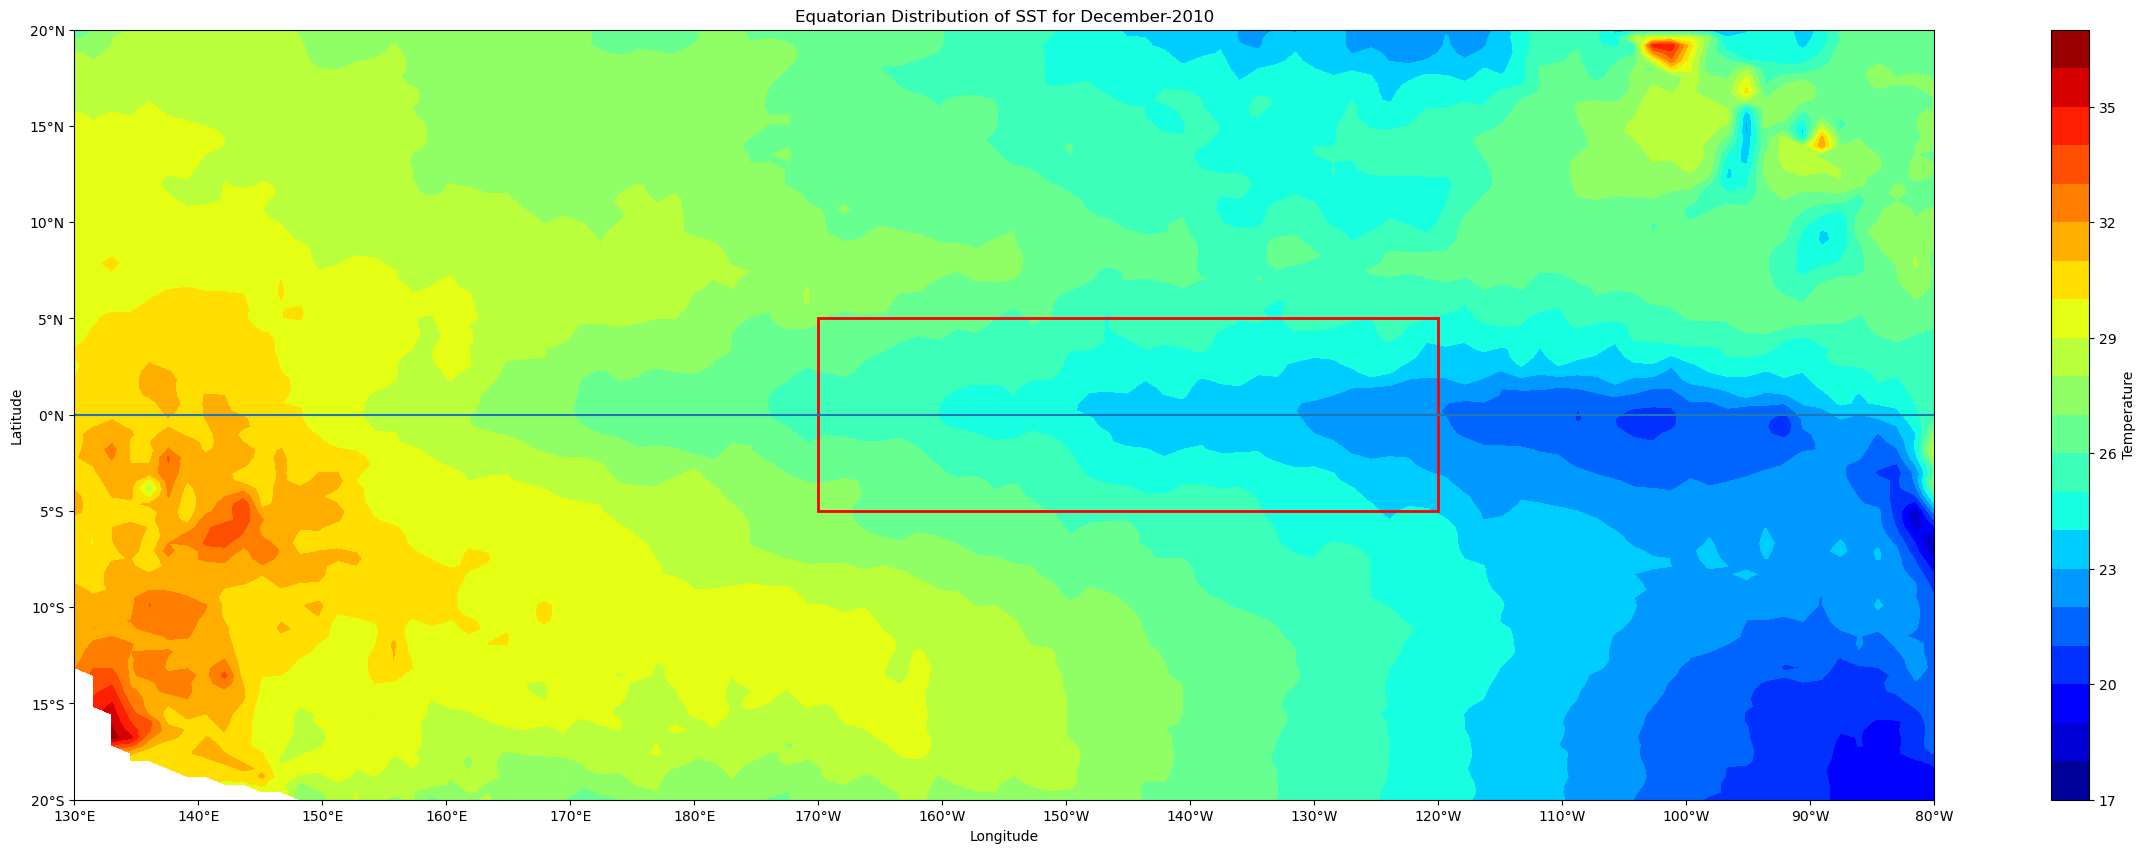

In [24]:
plt.figure(figsize=(30, 10))

# contour map
lon_grid = np.linspace(tidy_data.lon.min(), tidy_data.lon.max(), 100)
lat_grid = np.linspace(tidy_data.lat.min(), tidy_data.lat.max(), 100)
lon_grid, lat_grid = np.meshgrid(lon_grid, lat_grid)
sst_grid = griddata((tidy_data.lon, tidy_data.lat), tidy_data.sst, (lon_grid, lat_grid), method='linear')
plt.contourf(lon_grid, lat_grid, sst_grid, cmap='jet', levels=20)


# plt.scatter(tidy_data.lon, tidy_data.lat, c=tidy_data.sst, cmap='jet', alpha=0.7, s=150, vmin=20, vmax=35)
plt.colorbar(label='Temperature')

x_tick=np.arange(130, 290, 10)
x_label=[f'{x}°E' if x <= 180 else f'{360 - x}°W' for x in x_tick]

y_tick = np.arange(-20, 25, 5)
y_label = [f'{np.abs(x)}°S' if x < 0 else f'{np.abs(x)}°N' for x in y_tick]

box = plt.Rectangle((190, -5), 50, 10, linewidth=2, edgecolor='RED', facecolor='none')
plt.gca().add_patch(box)

plt.axhline(y=0)

plt.xticks(ticks=x_tick, labels=x_label)
plt.yticks(ticks=y_tick, labels=y_label)

plt.xlim(130, 280)
plt.ylim(-20, 20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Equatorian Distribution of SST for {current_month.month_name()}-{current_month.year}')  # Title of the plot
plt.show()  # Display the plot

The anomalies observed on the NE and SW quadrants of the diagram are false measurments taken at the earth surface.
We need to extract the python code of reading a dataset and converting it to clean and tidy csv to a function and in addition, to be able to read dirs reccursivly and apply the transformation to all datasets.

In [25]:
result_list = extract_datasets('data/AQUA_MODIS/ELNINO/2015/')

In [28]:
dataset = result_list

In [31]:
df = create_dataframe(*dataset)

KeyError: 0